We get

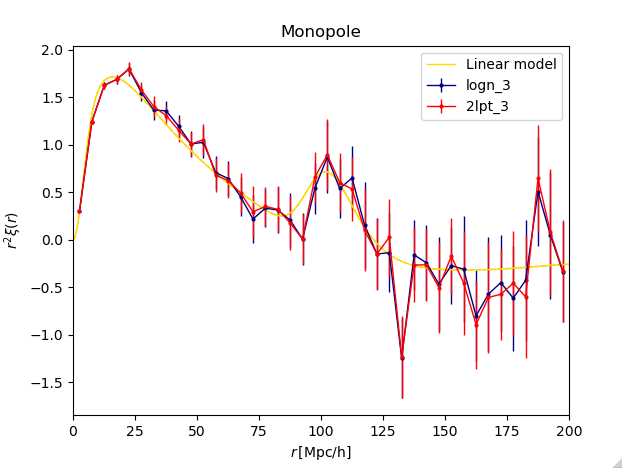

The boxes are:
- /global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/high_3x2_600_2lpt_bias3_multibias/
- /global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/high_3x2_600_bias3_multibias/

In [3]:
from pathlib import Path
import filecmp

In [9]:
def get_filename(ifile, source=0):
    return f'out_srcs_s{source}_{ifile}.fits'

In [4]:
logn_box = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/high_3x2_600_bias3_multibias/')
lpt_box = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/high_3x2_600_2lpt_bias3_multibias/')

In [10]:
for ifile in range(32):
    filename = get_filename(ifile)
    logn_file = logn_box / filename
    lpt_file = lpt_box / filename
    print(filecmp.cmp(logn_file, lpt_file))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


Likely to fail due to times, etc... but fast to check just in case.

In [26]:
import fitsio
import numpy as np

In [11]:
ifile = 0
filename = get_filename(ifile)

In [58]:
def get_field_differences(field, ifile, ifile2=None):
    filename = get_filename(ifile)
    filename2 = get_filename(ifile2) if ifile2 is not None else filename
    logn_field = fitsio.read(logn_box / filename)[field]
    lpt_field = fitsio.read(lpt_box / filename2)[field]
    
    print('Equal?: ', np.array_equal(logn_field, lpt_field))
    print('Shapes:\n\tlogn: ', np.shape(logn_field), '\n\tlpt: ', np.shape(lpt_field))
    print('logn not in lpt: ', np.logical_not(np.in1d(logn_field, lpt_field)).sum())
    print('lpt not in logn: ', np.logical_not(np.in1d(lpt_field, logn_field)).sum())

In [ ]:
get_field_differences('Z_COSMO', 0)

Equal?:  False
Shapes:
	logn:  (2549831,) 
	lpt:  (2549838,)
logn not in lpt:  49326
lpt not in logn:  49423


In [ ]:
get_field_differences('RA', 0)

Equal?:  False
Shapes:
	logn:  (2549831,) 
	lpt:  (2549838,)
logn not in lpt:  44805
lpt not in logn:  44752


In [56]:
get_field_differences('DEC', 0)

Equal?:  False
Shapes:
	logn:  (2549831,) 
	lpt:  (2549838,)
logn not in lpt:  52795
lpt not in logn:  52653


In [57]:
get_field_differences('DZ_RSD', 0)

Equal?:  False
Shapes:
	logn:  (2549831,) 
	lpt:  (2549838,)
logn not in lpt:  55545
lpt not in logn:  55492


In [68]:
def get_field_differences_full(field, ifilenum=32):
    _length_logn = 0
    _length_lpt = 0
    for ifile in range(ifilenum):
        filename = get_filename(ifile)
        _length_logn += len( fitsio.read(logn_box / filename) )
        _length_lpt += len( fitsio.read(lpt_box / filename) )
    
    logn_data = np.empty(_length_logn, dtype=[(field,'f8')])
    lpt_data = np.empty(_length_lpt, dtype=[(field,'f8')])
    
    _index_logn = 0
    _index_lpt = 0
    for ifile in range(ifilenum):
        print('reading file: ', ifile)
        _logn_file = fitsio.read(logn_box / filename)
        _file_size = len(_logn_file)
        logn_data[field][_index_logn:_index_logn+_file_size] = _logn_file[field]
        
        _lpt_file = fitsio.read(lpt_box / filename)
        _file_size = len(_lpt_file)
        lpt_data[field][_index_lpt:_index_lpt+_file_size] = _lpt_file[field]
        
    print('Equal?: ', np.array_equal(logn_data, lpt_data))
    print('Shapes:\n\tlogn: ', np.shape(logn_data), '\n\tlpt: ', np.shape(lpt_data))
    print('logn not in lpt: ', np.logical_not(np.in1d(logn_data, lpt_data)).sum())
    print('lpt not in logn: ', np.logical_not(np.in1d(lpt_data, logn_data)).sum())    

In [69]:
get_field_differences_full('Z_COSMO')

reading file:  0
reading file:  1
reading file:  2
reading file:  3
reading file:  4
reading file:  5
reading file:  6
reading file:  7
reading file:  8
reading file:  9
reading file:  10
reading file:  11
reading file:  12
reading file:  13
reading file:  14
reading file:  15
reading file:  16
reading file:  17
reading file:  18
reading file:  19
reading file:  20
reading file:  21
reading file:  22
reading file:  23
reading file:  24
reading file:  25
reading file:  26
reading file:  27
reading file:  28
reading file:  29
reading file:  30
reading file:  31
Equal?:  False
Shapes:
	logn:  (81557442,) 
	lpt:  (81557525,)
logn not in lpt:  34068
lpt not in logn:  33987
